### 1. Descriptive Statistics

In [89]:
# Modules
import inspect
import numpy as np
import pandas as pd
import seaborn as sns
import inspect
import warnings
from tqdm import tqdm

from sklearn import ensemble, metrics, model_selection, preprocessing, tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the cleaned data set
df = pd.read_csv('data.csv')
df = df.drop('SK_ID_CURR', axis = 1)

# Compute descriptive statistics for each variable
var_describe = pd.DataFrame(df.describe(include='all')).T

# Count the number of missing values for each variable
var_missing = pd.DataFrame(df.isnull().sum())

# Concatenate the descriptive statistics and missing value counts for all variables
result = var_describe.rename(columns={'count': 'Non-missing Count', 'mean': 'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', '25%': '25th percentile', '50%': '50th percentile', '75%': '75th percentile', 'max': 'Maximum', 'unique': 'Unique Values Count', 'top': 'Mode', 'freq': 'Mode Frequency'})
result['Missing Count'] = var_missing
result['Data Type'] = df.dtypes

# Display the result
pd.set_option('display.max_rows', None)
display(result)

,Non-missing Count,Unique Values Count,Mode,Mode Frequency,Mean,Standard Deviation,Minimum,25th percentile,50th percentile,75th percentile,Maximum,Missing Count,Data Type
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0,0,int64
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
CNT_CHILDREN,307511.0,NaN,NaN,NaN,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0,0,int64
AMT_INCOME_TOTAL,307511.0,NaN,NaN,NaN,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0,0,float64
AMT_CREDIT,307511.0,NaN,NaN,NaN,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0,0,float64
AMT_ANNUITY,307511.0,NaN,NaN,NaN,27108.573909,14493.454517,1615.5,16524.0,24903.0,34596.0,258025.5,0,float64
AMT_GOODS_PRICE,307511.0,NaN,NaN,NaN,538396.207429,369279.426396,40500.0,238500.0,450000.0,679500.0,4050000.0,0,float64


In [3]:
# Display the first five rows
result = df.head().T
display(result)

,0,1,2,3,4
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5
AMT_GOODS_PRICE,351000.0,1129500.0,135000.0,297000.0,513000.0


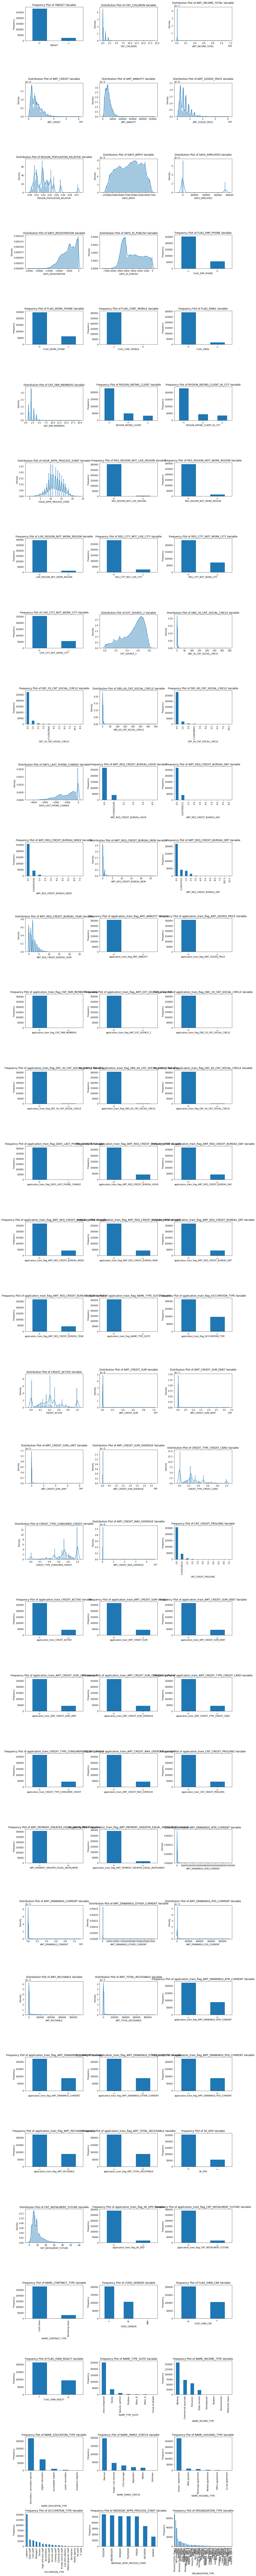

In [4]:
# Plot (frequency) distribution plot for each variable
warnings.simplefilter('ignore', category=FutureWarning)

# Select the numeric columns of X
df_numeric = df.select_dtypes(include='number')

# Select the non-numeric columns of X
df_non_numeric = df.select_dtypes(exclude='number')

df_all = pd.concat([df_numeric, df_non_numeric], axis=1)
nplots = len(df_all.columns)
nrows = nplots // 3
fig, axes = pyplot.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))
axes = axes.flatten()

# Plot a frequency plot for categorical variables and a distribution plot for all other variables
for i, col in enumerate(df_all.columns):
    if df_all[col].nunique() < 15 or df_all[col].dtype == 'object':
        df_all[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Frequency Plot of {col} Variable')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        sns.distplot(df_all[col], ax=axes[i])
        axes[i].set_title(f'Distribution Plot of {col} Variable')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')    
        
pyplot.tight_layout()
pyplot.show()

### 2. Transformation and Feature Engineering

##### 2.1 Convert some continuous variables that are related to income or have extreme outliers to bins based on WOE (weight of evidence)

In [5]:
columns_to_convert = ["AMT_INCOME_TOTAL", "DAYS_EMPLOYED", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "AMT_DRAWINGS_ATM_CURRENT", 
                      "AMT_DRAWINGS_CURRENT", "AMT_TOTAL_RECEIVABLE", "AMT_DRAWINGS_OTHER_CURRENT", "AMT_RECIVABLE", "AMT_CREDIT_MAX_OVERDUE", 
                      "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_DRAWINGS_POS_CURRENT", "AMT_CREDIT_SUM_OVERDUE"]

# Define number of bins
n_bins = 10

for col in columns_to_convert:
    # Bin the continuous variable
    df[col] = pd.qcut(df[col], n_bins, duplicates='drop')
    
    # Check the number of unique values in the binned column
    if df[col].nunique() < 2:
        # Drop the binned column if there is only one bin
        df = df.drop(col, axis=1)
    else:
        # Calculate WOE for each bin
        woe = df.groupby(col)['TARGET'].agg(['count', 'sum'])
        woe['non_events'] = woe['count'] - woe['sum']
        woe['event_rate'] = woe['sum'] / woe['count']
        woe['non_event_rate'] = woe['non_events'] / woe['count']
        woe['WOE'] = np.log(woe['non_event_rate'] / woe['event_rate'])
        
        # Map WOE values to binned variable
        df[f'{col}_WOE'] = df[col].map(woe['WOE'])

##### 2.2 Convert categorical variables into dummies

In [6]:
# Select columns with unique values less than 15 or object data type
columns_to_convert = df.columns[(df.nunique() <= 15) & (df.nunique() > 2) | (df.dtypes == 'object') | (df.dtypes == 'category')]

# Convert selected columns to dummies
df = pd.get_dummies(df, columns=columns_to_convert)

##### 2.3 Standardization and Normalization

In [67]:
# Identify the dummy and numeric columns in the dataset
y = df['TARGET']
X = df.drop('TARGET', axis=1)

dummy_columns = [col for col in X.columns if len(X[col].unique()) == 2]
numeric_columns = [col for col in X.columns if col not in dummy_columns and col != 'TARGET']

# Create a ColumnTransformer to standardize the numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(), numeric_columns)
    ],
    remainder='passthrough'
)

# Standardize the numeric columns in the dataset
standardized_data = preprocessor.fit_transform(X)

# Create a new dataframe with the standardized data
standardized_df = pd.DataFrame(standardized_data, columns=X.columns)

# Normalize the data, excluding the target variable
normalized_X = standardized_df.copy()
normalized_X[numeric_columns] = min_max_scaler.fit_transform(standardized_df[numeric_columns])

# Print the first 5 rows of the new dataframe
data_sta_nor = pd.concat([y, normalized_X], axis=1)

##### 2.4 Clustering based on K-Means to reduce dimension of independent variables

In [7]:
# Separate the independent and dependent variables
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Transpose your data so that rows represent variables and columns represent data points
X = X.T

# Define the range of k values to test
k_values = range(10, 101, 10)

# Create lists to store the SSE and silhouette scores
sse_values = []
silhouette_values = []

# Calculate the SSE and silhouette score for each value of k
for k in tqdm(k_values):
    # Create a k-means model
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to your data
    kmeans.fit(X)
    
    # Calculate the SSE
    sse = kmeans.inertia_
    sse_values.append(sse)
    
    # Calculate the silhouette score
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_values.append(silhouette)

100%|██████████| 10/10 [28:51<00:00, 173.13s/it]


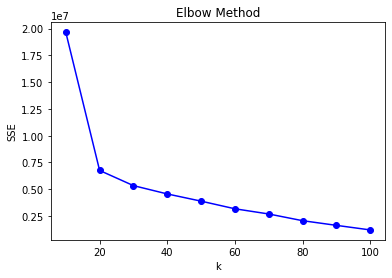

In [9]:
# Plot the SSE values against k
pyplot.plot(k_values, sse_values, 'bo-')
pyplot.xlabel('k')
pyplot.ylabel('SSE')
pyplot.title('Elbow Method')
pyplot.show()

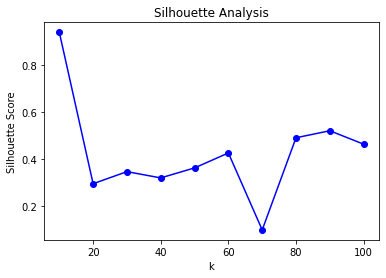

In [10]:
# Plot the silhouette scores against k
pyplot.plot(k_values, silhouette_values, 'bo-')
pyplot.xlabel('k')
pyplot.ylabel('Silhouette Score')
pyplot.title('Silhouette Analysis')
pyplot.show()

In [70]:
# Define the number of clusters
k = 60

# Transpose the data so that rows represent variables and columns represent observations
data = data_sta_nor.T

# Create a k-means model
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(data)

# Get the cluster assignments for each variable
clusters = kmeans.labels_

# Calculate the correlation matrix for the data
corr_matrix = df.corr()

# Find the most representative variable within each cluster
representative_variables = []
for i in range(k):
    # Get the indices of the variables in the current cluster
    cluster_indices = np.where(clusters == i)[0]
    
    # Get the correlation matrix for the current cluster
    cluster_corr_matrix = corr_matrix.iloc[cluster_indices, cluster_indices]
    
    # Calculate the average correlation for each variable in the cluster
    avg_correlations = cluster_corr_matrix.mean()
    
    # Find the index of the variable with the highest average correlation
    most_representative_variable = avg_correlations.idxmax()
    
    # Add the most representative variable to the list
    representative_variables.append(most_representative_variable)

In [75]:
# Select the representative variables from the dataset
selected_df = data_sta_nor.loc[:, representative_variables]

selected_df = pd.concat([y, selected_df], axis=1)

In [76]:
# Define a function to convert True/False values to 0/1
def convert_bool(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return x

# Convert the True/False values in the dataset to 0/1
selected_df = selected_df.applymap(convert_bool)